In [1]:
import wandb
import sys
import matplotlib.pyplot as plt
import scprep
import pandas as pd
sys.path.append('../src/')
from evaluate import get_results

In [2]:
# Initialize wandb (replace 'your_entity' and 'your_project' with your specific details)
wandb.login()
api = wandb.Api()

# Specify your entity, project, and sweep ID
entity = "xingzhis"
project = "dmae"
# sweep_id = "cnpdtv5t"
# sweep_id = 'zt4xeuwa'
sweep_id = '4fvcno8c' # baseline

# Fetch the sweep
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")

run_ids = [run.id for run in sweep.runs]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: xingzhis. Use `wandb login --relogin` to force relogin


In [4]:
sweep_id = 'i1whpk6v'
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
for run in sweep.runs:
    run_ids.append(run.id)

In [6]:
res_list = []
for run_id in run_ids:
    run = api.run(f"{entity}/{project}/{run_id}")
    res, plots, cfg = get_results(run)
    res_list.append(
        dict(
            run_id=run_id,
            res=res,
            plots=plots,
            cfg=cfg
        )
    )

In [7]:
res_eb = []
for res in res_list:
    cfg = res['cfg']
    try:
        if cfg['data']['name'] == 'eb_subset' and \
            cfg['data']['preprocess'] in ['none'] and \
            cfg['model']['type'] == 'ae' and \
            cfg['model']['dist_reconstr_weights'] == [0.9,0.1,0.] and \
            cfg['training']['match_potential'] == True:
            print(res['run_id'])
            res_eb.append(res)
    except:
        pass

fw1r3f4d
mwyowora
f6nev11t
v1l42y0e
hudbbius
z0xmrhni


In [8]:
for res in res_eb:
    if 'dist_mse_decay' in res['cfg'].model:
        decay = res['cfg'].model.dist_mse_decay
    else:
        decay = 0
    res['decay'] = decay
    print(res['run_id'], decay)

fw1r3f4d 0
mwyowora 0.01
f6nev11t 0.5
v1l42y0e 0.1
hudbbius 0.2
z0xmrhni 1


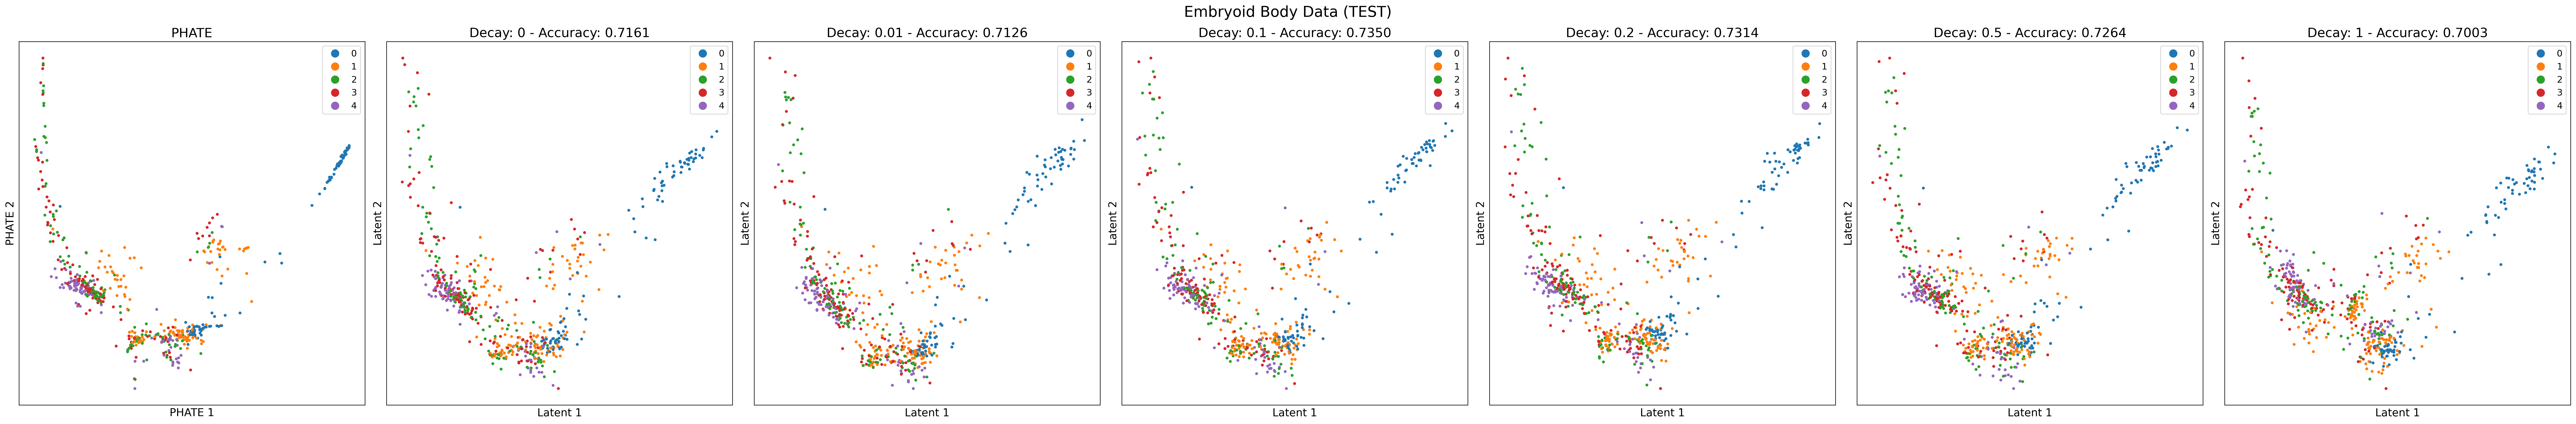

In [14]:
res_bar = []
for res in res_eb:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    decay = res['decay']
    acc_all = 1 - res['res']['dist_mape_test_overall']
    acc_test_test = 1 - res['res']['dist_mape_test_test']
    acc_test_train = 1 - res['res']['dist_mape_test_train']
    res_bar.append(
        dict(
            decay=decay,
            acc_all=acc_all,
            acc_test_test=acc_test_test,
            acc_test_train=acc_test_train
        )
    )
res_bar = pd.DataFrame(res_bar)
res_plot = {}
decays = []
for res in res_eb:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    decay = res['decay']
    res_plot[decay] = \
        dict(
            decay=decay,
            acc_all= 1 - res['res']['dist_mape_test_overall'],
            plots=res['plots']
        )
    decays.append(decay)

fig, axes = plt.subplots(1, len(res_plot)+1, figsize=(len(res_plot) * 8, 8), dpi=300)  # Modify the number of subplots to 3, adjust the figsize, and set dpi to 300

res = res_plot[0]
scprep.plot.scatter2d(res['plots']['phate_true'], c=res['plots']['colors'], ax=axes[0], ticks=False, label_prefix="PHATE ", title='PHATE')

for i, decay in enumerate(sorted(decays)):
    ax = axes[i+1]
    res = res_plot[decay]
    scprep.plot.scatter2d(res['plots']['phate_pred'], c=res['plots']['colors'], ax=axes[i+1], ticks=False, label_prefix="Latent ", title=f'Decay: {res["decay"]} - Accuracy: {res["acc_all"]:0.4f}')
plt.suptitle(f"Embryoid Body Data (TEST)", fontsize=20)
plt.tight_layout()
plt.show()

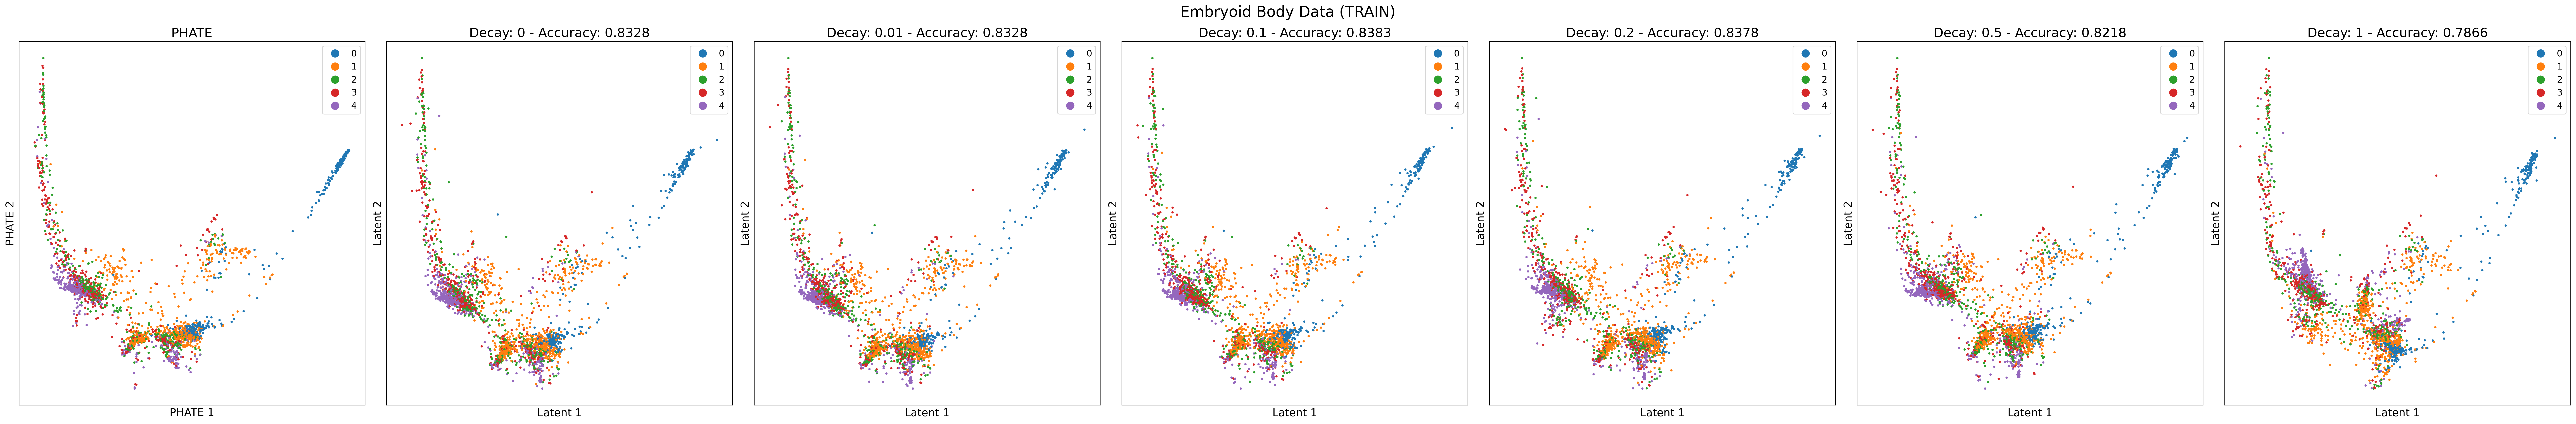

In [22]:
res_bar = []
for res in res_eb:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    decay = res['decay']
    acc_all = 1 - res['res']['dist_mape_test_overall']
    acc_test_test = 1 - res['res']['dist_mape_test_test']
    acc_test_train = 1 - res['res']['dist_mape_test_train']
    acc_train_train = 1 - res['res']['dist_mape_train_train']
    res_bar.append(
        dict(
            decay=decay,
            acc_all=acc_all,
            acc_test_test=acc_test_test,
            acc_test_train=acc_test_train,
            acc_train_train=acc_train_train
        )
    )
res_bar = pd.DataFrame(res_bar)
res_plot = {}
decays = []
for res in res_eb:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    decay = res['decay']
    res_plot[decay] = \
        dict(
            decay=decay,
            acc_train_train= 1 - res['res']['dist_mape_train_train'],
            plots=res['plots']
        )
    decays.append(decay)

fig, axes = plt.subplots(1, len(res_plot)+1, figsize=(len(res_plot) * 8, 8), dpi=300)  # Modify the number of subplots to 3, adjust the figsize, and set dpi to 300

res = res_plot[0]
scprep.plot.scatter2d(res['plots']['phate_true_train'], c=res['plots']['colors_train'], ax=axes[0], ticks=False, label_prefix="PHATE ", title='PHATE')

for i, decay in enumerate(sorted(decays)):
    ax = axes[i+1]
    res = res_plot[decay]
    scprep.plot.scatter2d(res['plots']['phate_pred_train'], c=res['plots']['colors_train'], ax=axes[i+1], ticks=False, label_prefix="Latent ", title=f'Decay: {res["decay"]} - Accuracy: {res["acc_train_train"]:0.4f}')
plt.suptitle(f"Embryoid Body Data (TRAIN)", fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
assert False

res_sea_ad = []
for res in res_list:
    cfg = res['cfg']
    try:
        if cfg['data']['name'] == 'sea_ad_gaba' and \
            cfg['data']['preprocess'] in ['none'] and \
            cfg['model']['type'] == 'ae' and \
            cfg['model']['dist_reconstr_weights'] == [0.9,0.1,0.] and \
            cfg['training']['match_potential'] == True:
            print(res['run_id'])
            res_sea_ad.append(res)
    except:
        pass

NameError: name 'res_list' is not defined

In [ ]:
for res in res_sea_ad:
    if 'dist_mse_decay' in res['cfg'].model:
        decay = res['cfg'].model.dist_mse_decay
    else:
        decay = 0
    res['decay'] = decay
    print(res['run_id'], decay)

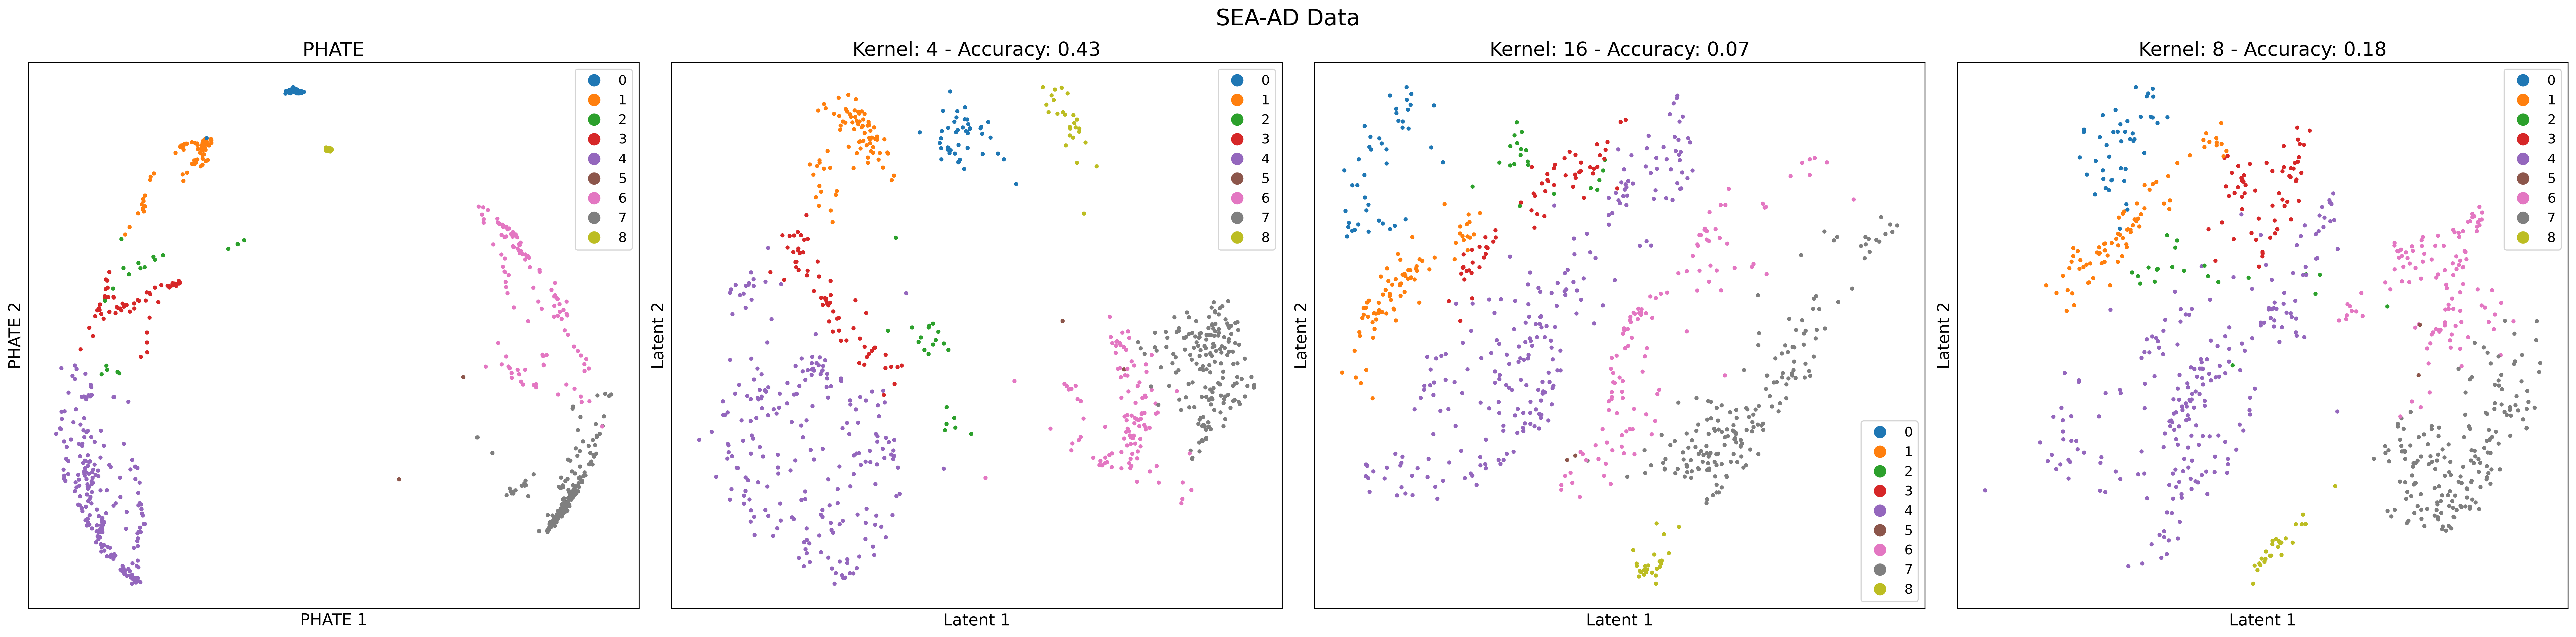

In [ ]:
res_bar = []
for res in res_sea_ad:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    decay = res['decay']
    acc_all = 1 - res['res']['dist_mape_test_overall']
    acc_test_test = 1 - res['res']['dist_mape_test_test']
    acc_test_train = 1 - res['res']['dist_mape_test_train']
    res_bar.append(
        dict(
            decay=decay,
            acc_all=acc_all,
            acc_test_test=acc_test_test,
            acc_test_train=acc_test_train
        )
    )
res_bar = pd.DataFrame(res_bar)
res_plot = {}
decays = []
for res in res_sea_ad:
    # preprocessing = res['res']['kernel'] if res['res']['kernel'] is not None else 'none'
    decay = res['decay']
    res_plot[decay] = \
        dict(
            decay=decay,
            acc_all= 1 - res['res']['dist_mape_test_overall'],
            plots=res['plots']
        )
    decays.append(decay)

fig, axes = plt.subplots(1, len(res_plot), figsize=(len(res_plot) * 8, 8), dpi=300)  # Modify the number of subplots to 3, adjust the figsize, and set dpi to 300

res = res_plot[0]
scprep.plot.scatter2d(res['plots']['phate_true'], c=res['plots']['colors'], ax=axes[0], ticks=False, label_prefix="PHATE ", title='PHATE')

for i, decay in enumerate(sorted(decays)):
    ax = axes[i+1]
    res = res_plot[decay]
    scprep.plot.scatter2d(res['plots']['phate_pred'], c=res['plots']['colors'], ax=axes[i+1], ticks=False, label_prefix="Latent ", title=f'Decay: {res["decay"]} - Accuracy: {res["acc_all"]:0.2f}')
plt.suptitle(f"SEA-AD Data", fontsize=20)
plt.tight_layout()
plt.show()